In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats
#referenced from online but it is been taken down

In [192]:
def to_epoch_time(arg):
    return arg.timestamp()

In [193]:
def search_rating(arg):
    match = re.search(r'(\d+(\.\d+)?)/10', arg)
    score = np.nan
    if match:
        score = float(match.group(1))
    return score

In [213]:
import re
party_re = re.compile(r'(\d+(\.\d+)?)/10')
def get_party(txt):
    match = party_re.search(txt)
    if match:
        return float(match.group(1))
    else:
        return None

In [215]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])
df = tweets['text']
tweets['score'] = df.apply(get_party)
tweets['timestamp'] = tweets['created_at'].apply(to_epoch_time)
tweets.sort_values('timestamp', axis=0, ascending=True, inplace=True)
tweets = tweets.dropna()
tweets = tweets[(tweets['score'] <= 20) & (tweets['score'] >= -20)]

In [211]:
import re
party_re = re.compile(r'(\d+(\.\d+)?)/10')
def get_party(txt):
    match = party_re.search(txt)
    if match:
        return float(match.group(1))
    else:
        return None
    
get_party = np.vectorize(get_party, otypes=[np.float])

In [212]:
tweets = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1])
df = tweets['text']
tweets['score'] = get_party(df)
tweets['timestamp'] = tweets['created_at'].apply(to_epoch_time)
tweets.sort_values('timestamp', axis=0, ascending=True, inplace=True)
tweets = tweets.dropna()
tweets = tweets[(tweets['score'] <= 20) & (tweets['score'] >= -20)]

In [218]:
import seaborn
seaborn.set()

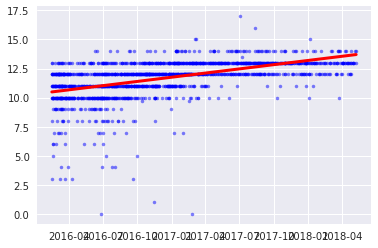

In [221]:
plt.plot(tweets['created_at'] , tweets['score'],'b.', alpha=0.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(tweets['timestamp'], tweets['score'])
plt.plot(tweets['created_at'], intercept + slope*tweets['timestamp'], 'r', linewidth=3)

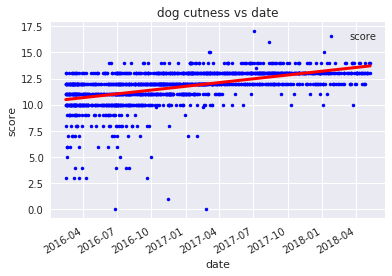

In [222]:
tweets.plot(x='created_at', y='score', style='b.')
reg = stats.linregress(tweets['timestamp'], tweets['score'])
plt.plot(tweets['created_at'], reg.intercept + reg.slope*tweets['timestamp'], 'r', linewidth=3)
plt.xlabel('date')
plt.ylabel('score')
plt.title('dog cutness vs date')`
plt.savefig('dog-rates-result.png')

In [200]:
tweets = pd.DataFrame({'text': [
    "I'm voting for Green",
    'Get out and vote for @terrybeech!',
    'How do I vote?'
]})